# Lab #3

Student Name: Nabhanya Sharma

Student ID: 500826185

Video demo: https://loom.com/share/dca81bde922c4ac4be891aecc8863007?sid=80fc8a05-d27a-4530-87ac-30ff340166e2


### Part A

In [389]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

EDA:

Percentage of 0: 65.36796536796537
Percentage of 1: 34.63203463203463

Missing values:
row.names    0
sbp          0
tobacco      0
ldl          0
adiposity    0
famhist      0
typea        0
obesity      0
alcohol      0
age          0
chd          0
dtype: int64

Number of categorical variables: 1



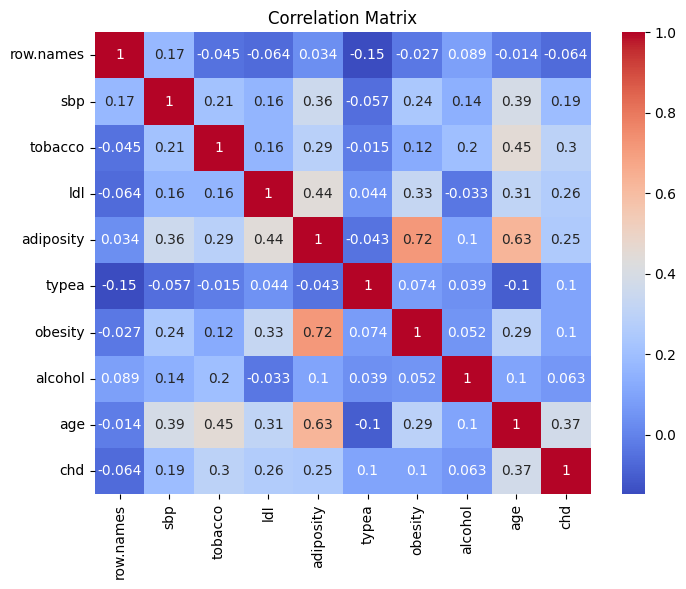

In [390]:
data = pd.read_csv("https://raw.githubusercontent.com/yoga-suhas-km/Intelligent_systems/main/heart_dataset.csv")

#Percentages
zeros=sum(data['chd']==0)
ones=sum(data['chd']==1)

percentage_0=(zeros/len(data))*100
percentage_1=(ones/len(data))*100

print("Percentage of 0:", percentage_0)
print("Percentage of 1:", percentage_1)
print()

#Missing values
missing_values=data.isnull().sum()

print("Missing values:")
print(missing_values)
print()

#Number of Categorial Variables
categories = data.select_dtypes(include=['object']).columns
num_categories=len(categories)
print("Number of categorical variables:", num_categories)
print()

#Correlation Matrix
correlation_matrix = data.corr(numeric_only=True)
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=ax)
ax.set_title('Correlation Matrix')
plt.show()

One-Hot-Encoding

In [391]:
encoded_data=pd.get_dummies(data,categories)
print(encoded_data)

     row.names  sbp  tobacco    ldl  adiposity  typea  obesity  alcohol  age  \
0            1  160    12.00   5.73      23.11     49    25.30    97.20   52   
1            2  144     0.01   4.41      28.61     55    28.87     2.06   63   
2            3  118     0.08   3.48      32.28     52    29.14     3.81   46   
3            4  170     7.50   6.41      38.03     51    31.99    24.26   58   
4            5  134    13.60   3.50      27.78     60    25.99    57.34   49   
..         ...  ...      ...    ...        ...    ...      ...      ...  ...   
457        459  214     0.40   5.98      31.72     64    28.45     0.00   58   
458        460  182     4.20   4.41      32.10     52    28.61    18.72   52   
459        461  108     3.00   1.59      15.23     40    20.09    26.64   55   
460        462  118     5.40  11.61      30.79     64    27.35    23.97   40   
461        463  132     0.00   4.82      33.41     62    14.70     0.00   46   

     chd  famhist_Absent  famhist_Prese

Standardization

In [392]:
num_columns = ['sbp', 'tobacco', 'ldl', 'adiposity', 'typea', 'obesity', 'alcohol', 'age']
standardized_data=data.copy()
standardized_data[num_columns] = StandardScaler().fit_transform(data[num_columns])
print(standardized_data)

     row.names       sbp   tobacco       ldl  adiposity  famhist     typea  \
0            1  1.058564  1.823073  0.478412  -0.295503  Present -0.418470   
1            2  0.277089 -0.790237 -0.159680   0.412140   Absent  0.193344   
2            3 -0.992806 -0.774980 -0.609245   0.884332  Present -0.112563   
3            4  1.546985  0.842264  0.807126   1.624141  Present -0.214532   
4            5 -0.211332  2.171805 -0.599577   0.305351  Present  0.703189   
..         ...       ...       ...       ...        ...      ...       ...   
457        459  3.696039 -0.705234  0.599263   0.812281   Absent  1.111065   
458        460  2.133091  0.123004 -0.159680   0.861173   Absent -0.112563   
459        461 -1.481228 -0.138545 -1.522877  -1.309364   Absent -1.336191   
460        462 -0.992806  0.384553  3.320823   0.692625   Absent  1.111065   
461        463 -0.309016 -0.792417  0.038515   1.029720  Present  0.907127   

      obesity   alcohol       age  chd  
0   -0.176786  3.27773

Hypothesis

In [393]:
def sigmoid(z):
  z=1 / (1 + np.exp(-z))
  return z

Cost Function

In [394]:
def binary_cross_entropy_loss(y, y_pred):
    cost=-1*np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
    return cost

Batch Gradient Descent Iteration

In [395]:
def batch_gradient_descent(X, y, learning_rate, epochs,theta):
    m, n = X.shape
    cost_history = []

    for epoch in range(epochs):
        z = np.dot(X, theta)
        y_pred = sigmoid(z)
        cost = binary_cross_entropy_loss(y, y_pred)
        cost_history.append(cost)

        error = y_pred - y

        gradient = np.dot(X.T, error) / m

        theta -= learning_rate * gradient

    return theta, cost_history

Initialization

In [396]:
theta = [random.uniform(0, 1) for i in range(9)]
theta = np.array(theta)
data['famhist'] = data['famhist'].map({'Present': 1, 'Absent': 0})
X = data.iloc[:, 2:].values
y = data.iloc[:, 10].values

Learning curves

<ipython-input-394-b881c31547e1>:2: RuntimeWarning: divide by zero encountered in log
  cost=-1*np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
<ipython-input-394-b881c31547e1>:2: RuntimeWarning: invalid value encountered in multiply
  cost=-1*np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


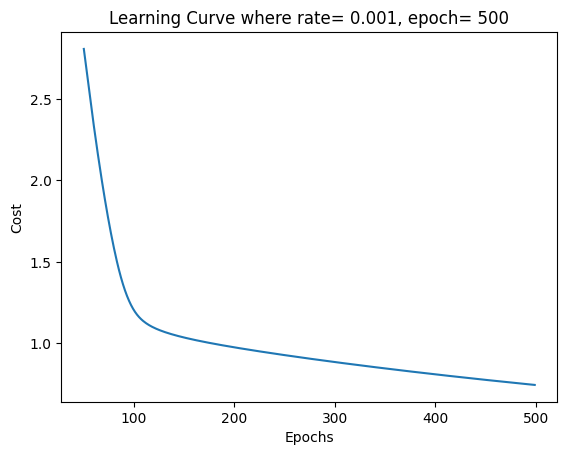

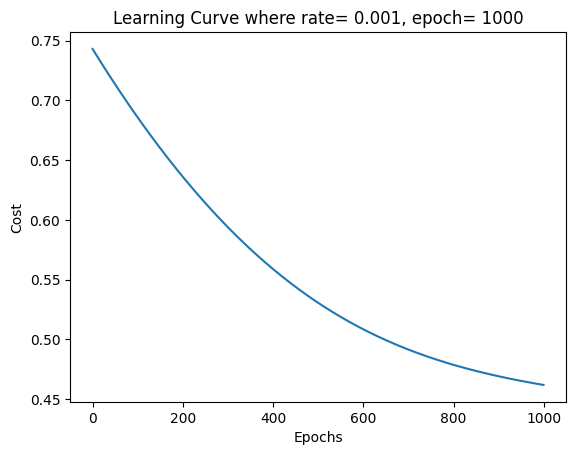

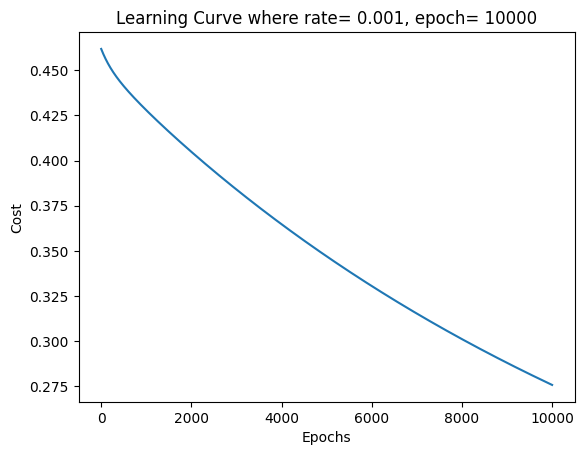

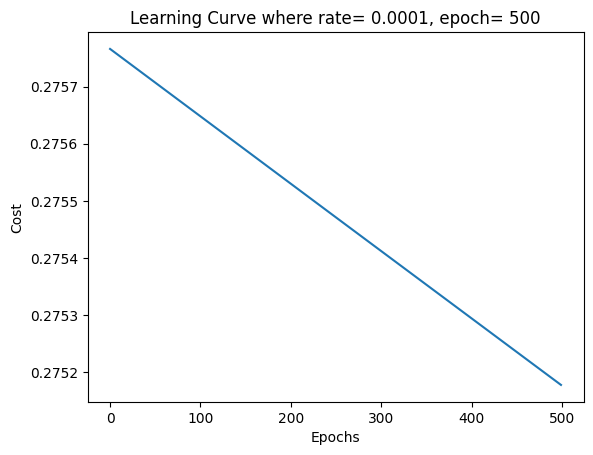

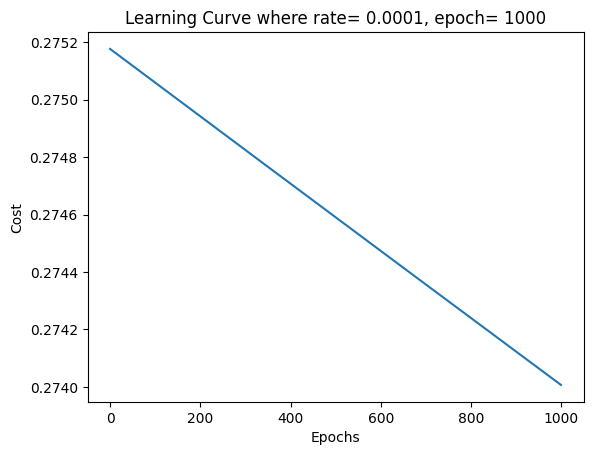

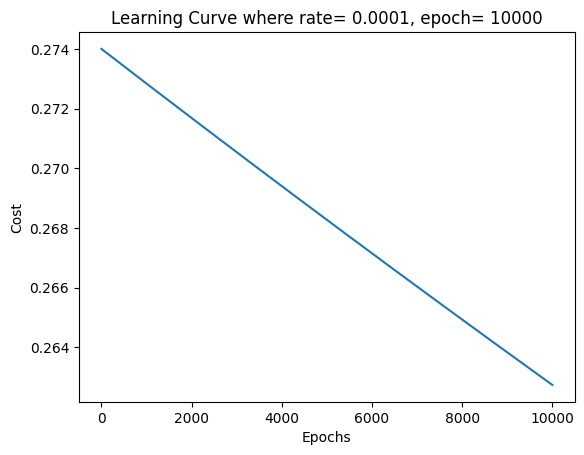

In [397]:
def plot_cost(X, y, i, j,theta):
    theta, cost_history = batch_gradient_descent(X, y, i, j,theta)
    plt.plot(range(j), cost_history)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Learning Curve where rate= '+str(i)+', epoch= '+str(j))
    plt.show()

learning_rate = [0.001,0.0001]
epochs = [500,1000,10000]

for i in learning_rate:
  for j in epochs:
    plot_cost(X, y, i, j,theta)


Mini-batch Gradient Descent Iteration

<ipython-input-394-b881c31547e1>:2: RuntimeWarning: divide by zero encountered in log
  cost=-1*np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))
<ipython-input-394-b881c31547e1>:2: RuntimeWarning: invalid value encountered in multiply
  cost=-1*np.mean(y * np.log(y_pred) + (1 - y) * np.log(1 - y_pred))


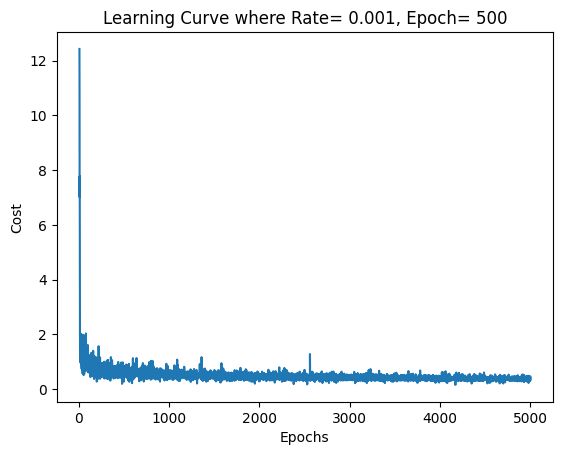

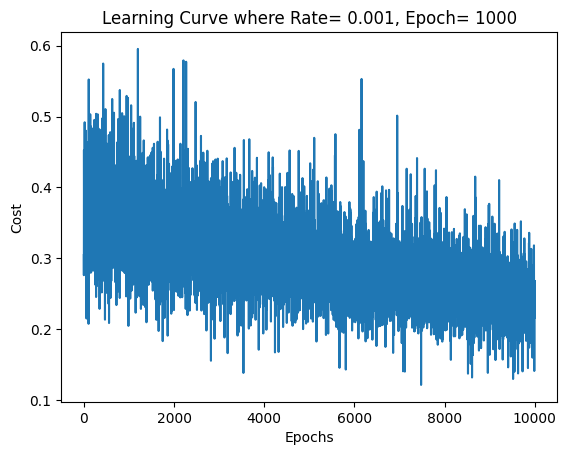

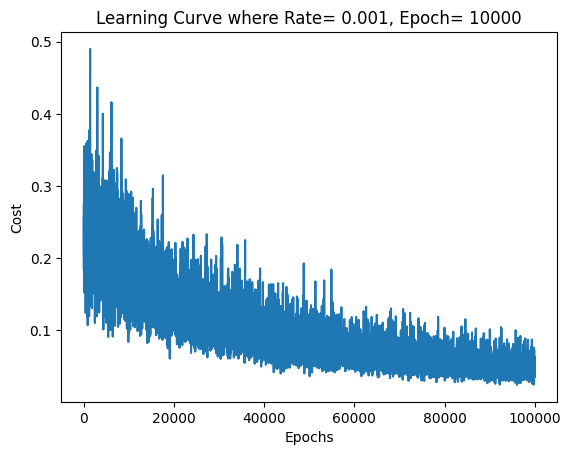

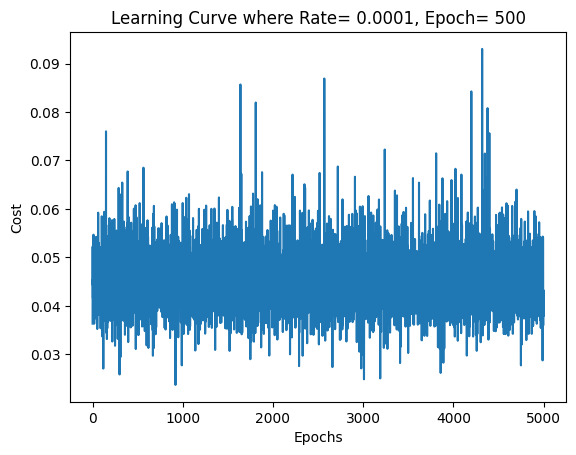

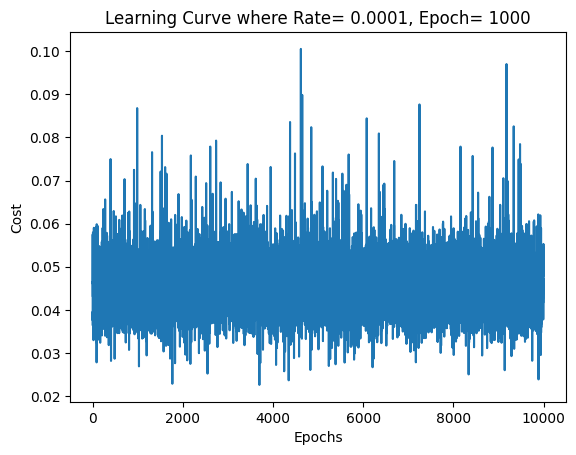

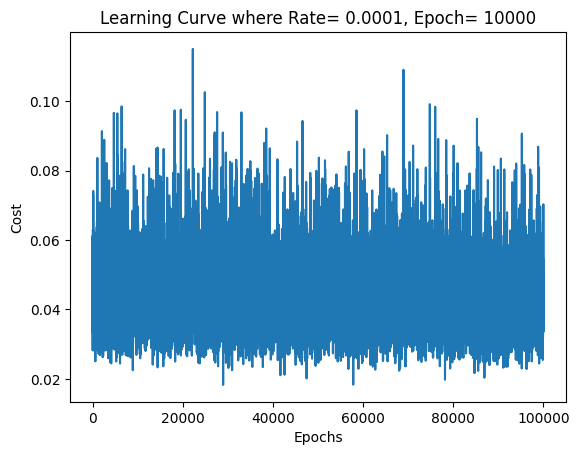

In [398]:
def mini_batch_gradient_descent(X, y, learning_rate, epochs, theta):
    m, n = X.shape
    batch_size=50
    cost_history = []

    for epoch in range(epochs):
        permutation = np.random.permutation(m)
        X_shuffled = X[permutation]
        y_shuffled = y[permutation]

        for i in range(0, m, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            z = np.dot(X_batch, theta)
            y_pred = sigmoid(z)
            cost = binary_cross_entropy_loss(y_batch, y_pred)
            cost_history.append(cost)

            error = y_pred - y_batch

            # Calculate gradients
            gradient = np.dot(X_batch.T, error) / batch_size

            # Update weights
            theta -= learning_rate * gradient

    return theta, cost_history

#Plot
theta = [random.uniform(0, 1) for i in range(9)]
theta = np.array(theta)
data['famhist'] = data['famhist'].map({'Present': 1, 'Absent': 0})

def plot_mini_cost(X, y, i, j,theta):
    theta, cost_history = mini_batch_gradient_descent(X, y, i, j,theta)
    plt.plot(range(len(cost_history)), cost_history)
    plt.xlabel('Epochs')
    plt.ylabel('Cost')
    plt.title('Learning Curve where Rate= '+str(i)+', Epoch= '+str(j))
    plt.show()

for i in learning_rate:
  for j in epochs:
    plot_mini_cost(X, y, i, j,theta)

Comparison using API

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


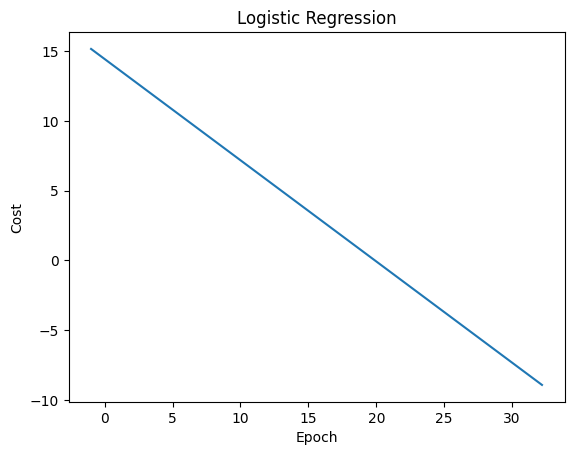

In [399]:
model = LogisticRegression()
model.fit(X, y)
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
x2 = np.linspace(x_min, x_max, 100)
y2 = (-model.intercept_ - model.coef_[0][0] * x2) / model.coef_[0][1]

plt.plot(x2, y2, label='Decision Boundary')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.title('Logistic Regression')
plt.show()

### Part B